In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('pcap2ipfix-applabel-yafscii.csv')
df

,start-time,end-time,duration,rtt,proto,sip,sp,dip,dp,iflags,...,isn,risn,pkt,oct,rpkt,roct,app,entropy,rentropy,end-reason
0,5/13/24 4:00 AM,5/13/24 4:02 AM,102.862,0.019,6,192.168.50.2,53694,172.253.63.132,443,S,...,13593c45,666cc648,5098.0,289043,171987,249579295,443,248,252,NaN
1,5/13/24 3:59 AM,5/13/24 4:01 AM,93.334,0.019,17,192.168.50.2,51566,142.251.111.139,443,0,...,00000000,00000000,1461.0,362151,8189,9688191,51443,251,251,eof
2,5/13/24 3:59 AM,5/13/24 4:01 AM,146.630,0.022,6,192.168.50.2,53584,23.73.231.167,443,S,...,de951e43,6ca77ba2,514.0,41901,3830,5498091,443,249,252,NaN
3,5/13/24 3:59 AM,5/13/24 4:01 AM,144.873,0.025,6,192.168.50.2,53582,23.73.231.167,443,S,...,cac840ea,6c7ffcf8,428.0,35404,3655,5333811,443,248,252,NaN
4,5/13/24 3:53 AM,5/13/24 4:02 AM,514.812,0.007,6,192.168.50.2,53537,185.199.110.133,443,S,...,eb193ddd,a6dbc164,205.0,17200,3373,4728071,443,248,252,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,5/13/24 4:02 AM,5/13/24 4:02 AM,0.000,0.000,6,192.168.50.2,53719,140.82.113.6,443,R,...,b9572e0b,00000000,1.0,40,0,0,0,0,0,NaN
3302,5/13/24 4:02 AM,5/13/24 4:02 AM,0.000,0.000,6,192.168.50.2,53725,104.70.78.191,443,R,...,8391eeb5,00000000,1.0,40,0,0,0,0,0,NaN
3303,5/13/24 4:02 AM,5/13/24 4:02 AM,0.000,0.000,6,192.168.50.2,53591,23.73.250.121,443,R,...,2c3a3618,00000000,1.0,40,0,0,0,0,0,NaN
3304,5/13/24 4:02 AM,5/13/24 4:02 AM,0.000,0.000,6,192.168.50.2,50736,35.204.29.97,443,R,...,16c2949d,00000000,1.0,40,0,0,0,0,0,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

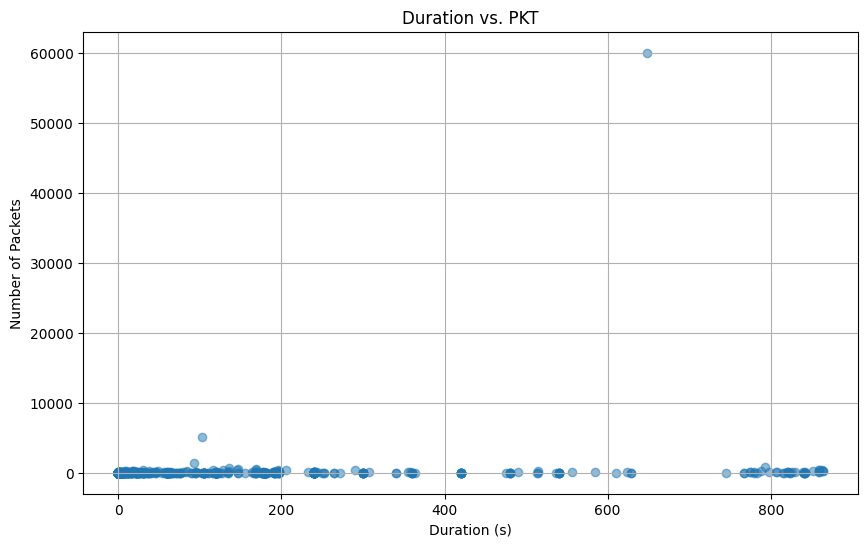

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['pkt'], alpha=0.5)
plt.xlabel('Duration (s)')
plt.ylabel('Number of Packets')
plt.title('Duration vs. PKT')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

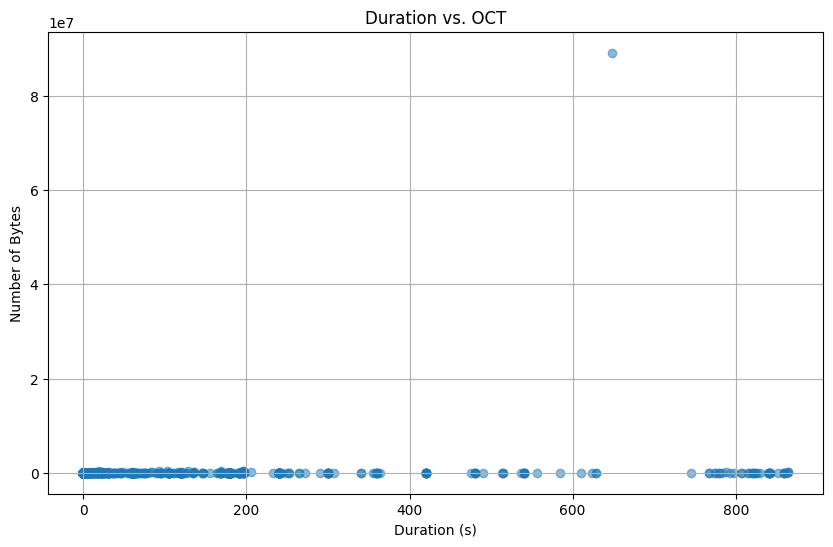

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['oct'], alpha=0.5)
plt.xlabel('Duration (s)')
plt.ylabel('Number of Bytes')
plt.title('Duration vs. OCT')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

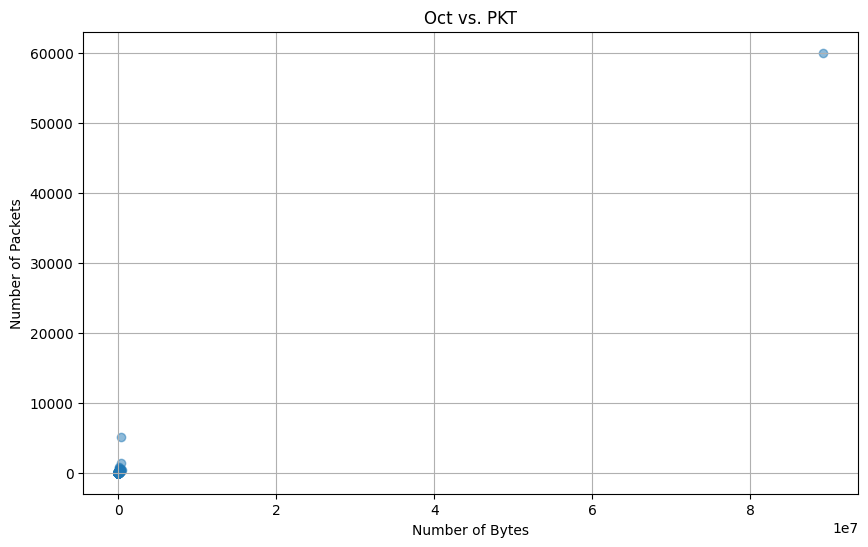

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['oct'], df['pkt'], alpha=0.5)
plt.xlabel('Number of Bytes')
plt.ylabel('Number of Packets')
plt.title('Oct vs. PKT')
plt.grid(True)
plt.show

In [56]:
print(df[['duration', 'rtt', 'pkt', 'oct', 'entropy', 'rpkt']].corr())

          duration       rtt       pkt       oct   entropy      rpkt
duration  1.000000  0.174060  0.111714  0.099635  0.149062  0.019676
rtt       0.174060  1.000000 -0.000298 -0.000472 -0.010506 -0.000430
pkt       0.111714 -0.000298  1.000000  0.996061  0.006115  0.110477
oct       0.099635 -0.000472  0.996061  1.000000 -0.006398  0.027787
entropy   0.149062 -0.010506  0.006115 -0.006398  1.000000  0.047134
rpkt      0.019676 -0.000430  0.110477  0.027787  0.047134  1.000000


In [57]:
# top used source ports
print(df['sp'].value_counts().head(10))

sp
0        290
443       93
5353      45
1900      14
55868      7
9999       4
53719      3
53669      3
53623      3
53593      3
Name: count, dtype: int64


In [58]:
# top used destination ports
print(df['dp'].value_counts().head(10))

dp
443      600
53       154
0        141
2048     139
5353      45
53652     14
7788      13
53106     11
61391     11
64081     11
Name: count, dtype: int64


In [59]:
top_flows = df.groupby(['sip','dip'])['pkt'].sum().sort_values(ascending=False).head(10)
print(top_flows)

sip                        dip                      
147.135.7.130              192.168.50.2                 60006.0
192.168.50.2               172.253.63.132                5208.0
                           8.8.8.8                       2100.0
                           142.251.111.139               1526.0
                           23.73.231.167                  948.0
                           162.159.61.3                   938.0
fe80::08da:b1cd:13d6:5571  fe80::14c4:9ebb:9270:4561      806.0
192.168.50.2               172.64.41.3                    639.0
                           139.71.89.13                   610.0
                           142.251.167.113                573.0
Name: pkt, dtype: float64


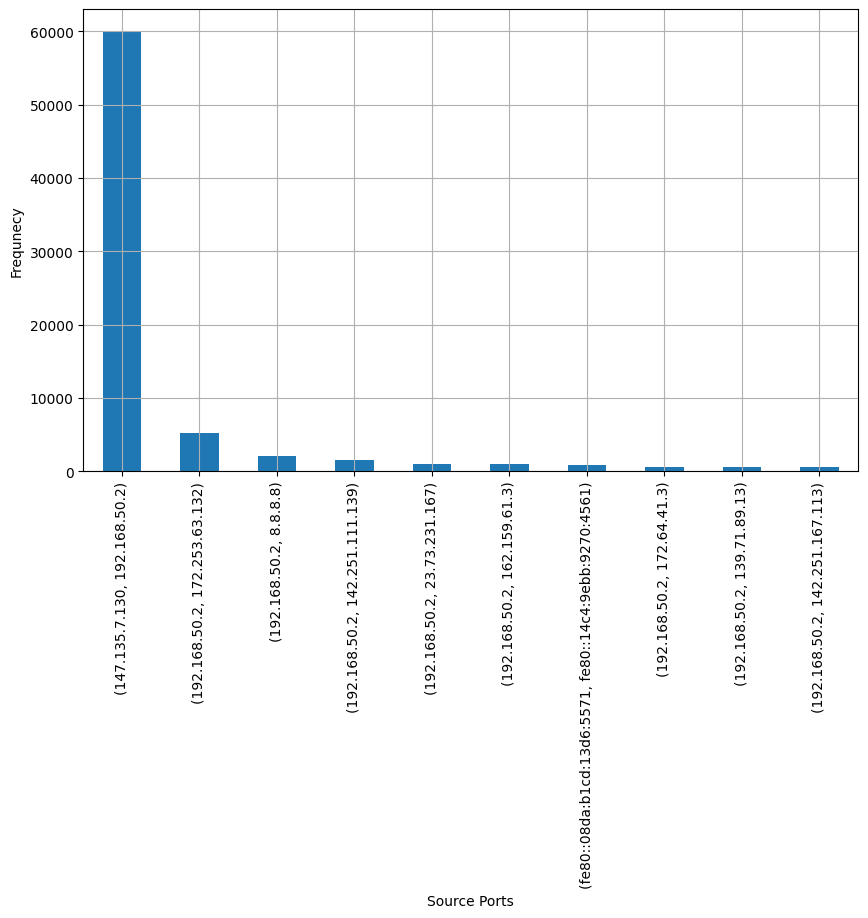

In [60]:
plt.figure(figsize=(10,6))
top_flows.plot(kind= 'bar')
plt.xlabel('Source Ports')
plt.ylabel('Frequnecy')
plt.grid(True)
plt.show()

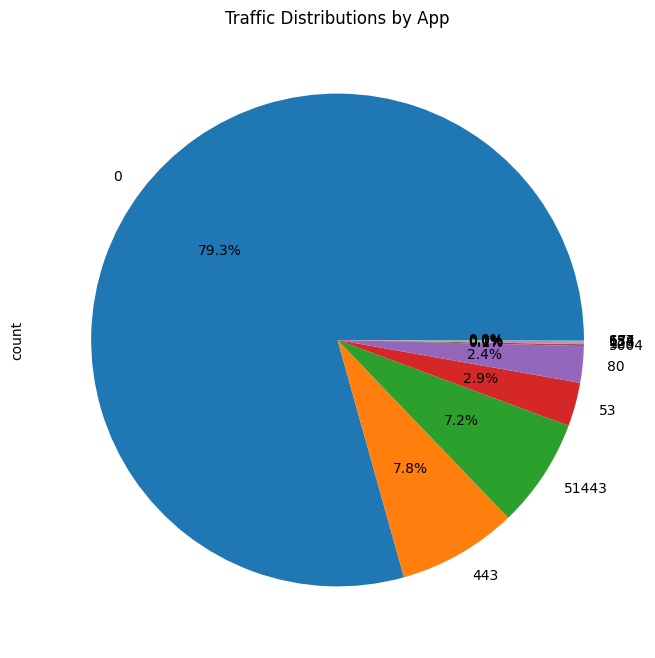

In [61]:
app_distribution = df['app'].value_counts()

plt.figure(figsize=(8,8))
app_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Traffic Distributions by App')
plt.show()

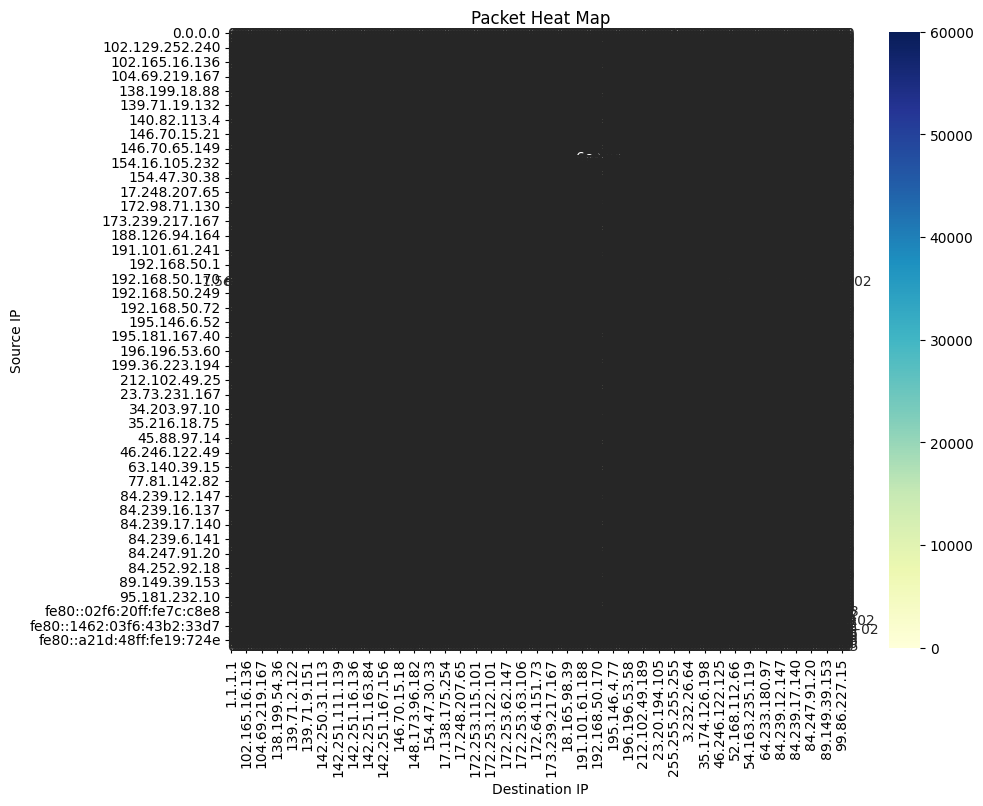

In [62]:
heatmap = df.pivot_table(index='sip', columns='dip', values= 'pkt', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, cmap="YlGnBu")
plt.title('Packet Heat Map')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()

In [63]:
df.columns = df.columns.str.strip()
df = df.drop(columns = ['isn', 'risn', 'entropy', 'rentropy'])
print(df.columns)

Index(['start-time', 'end-time', 'duration', 'rtt', 'proto', 'sip', 'sp',
       'dip', 'dp', 'iflags', 'uflags', 'riflags', 'ruflags', 'pkt', 'oct',
       'rpkt', 'roct', 'app', 'end-reason'],
      dtype='object')


In [64]:
iflag_flows = df.groupby('iflags').agg({
    'duration': 'sum',
    'rtt': 'mean',
    'pkt': 'sum',
    'oct': 'sum',
    'rpkt': 'sum',
    'roct': 'sum',
})
print(iflag_flows)

         duration       rtt      pkt       oct    rpkt       roct
iflags                                                           
0       51642.591  0.299650  13820.0   3703507   23585   22797451
A       11331.959  0.016935  60716.0  89324536    4923     332061
AF        120.279  0.002067     57.0      2928      50       2132
AP       5266.949  0.006000   1465.0    158222     931     195823
APF         0.038  0.012667      5.0      4532       3        120
AR          0.000  0.000000     17.0       716       0          0
ECS         0.396  0.003000     19.0      6188      19       6985
R           0.000  0.000000     46.0      1840       0          0
S       25301.319  0.003264  17349.0   4253201  195897  277951780


In [70]:
end_flows = df.groupby('end-reason').agg({
    'duration': 'sum',
    'rtt': 'mean',
    'pkt': 'sum',
    'oct': 'sum',
    'rpkt': 'sum',
    'roct': 'sum',
})
print(end_flows)

             duration       rtt      pkt      oct   rpkt      roct
end-reason                                                        
eof         43185.179  0.552445  11666.0  2767603  18974  18149763
idle        14237.153  0.001556   5778.0  1313888   5621   4852326


In [71]:
end_flag_flows = df.groupby(['end-reason', 'iflags']).agg({
    'duration': 'sum',
    'rtt': 'mean',
    'pkt': 'sum',
    'oct': 'sum',
    'rpkt': 'sum',
    'roct': 'sum',
})
print(end_flag_flows)

                    duration       rtt      pkt      oct   rpkt      roct
end-reason iflags                                                        
eof        0       37408.420  0.575951  10059.0  2524047  17981  17950201
           A         906.759  0.013333    107.0    67258     92     26161
           AF          0.026  0.009500      2.0      104      2       104
           AP       4249.025  0.013000   1315.0   135477    753    110944
           S         620.949  0.029444    183.0    40717    146     62353
idle       0       14234.171  0.009161   3761.0  1179460   5604   4847250
           A           0.000  0.000000      3.0      144      1        52
           AP          2.633  0.000000      4.0      653      4       280
           ECS         0.349  0.005000     13.0     5823     12      4744
           S           0.000  0.000000   1997.0   127808      0         0
